 Problem1 - Given the dataset in problem1.csv (3pts)

Problem 1-1. Calculate the first 4 moment values using the normalized formulas in the Week 1 notes.

In [148]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import t, norm, skew, kurtosis
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

file1 = '/Users/apple/Desktop/Duke/Fintech 545/Project/Project_week02/problem1.csv'  
file2 = '/Users/apple/Desktop/Duke/Fintech 545/Project/Project_week02/problem2.csv'  
file2x = '/Users/apple/Desktop/Duke/Fintech 545/Project/Project_week02/problem2_x.csv'
file3 = '/Users/apple/Desktop/Duke/Fintech 545/Project/Project_week02/problem3.csv'

In [110]:
def first4Moments(file1):
    df = pd.read_csv(file1)
    
    # get column 'x'
    data = df['x'].tolist() 
    
    n = len(data)
    
    # mean
    mean_value = sum(data) / n
    
    # variance
    variance_value = sum((x - mean_value)**2 for x in data) / n
    
    # skewness
    skewness_value = sum((x - mean_value)**3 for x in data) / n
    skewness_value /= (variance_value**1.5)  # standardized
    
    # kurtosis
    kurtosis_value = sum((x - mean_value)**4 for x in data) / n
    kurtosis_value /= (variance_value**2)  # standardized
    kurtosis_value -= 3 # to excess kurtosis
    
    return mean_value, variance_value, skewness_value, kurtosis_value

mean, variance, skewness, kurt = first4Moments(file1)


print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Mean: 1.0489703904839585
Variance: 5.4217934611998455
Skewness: 0.8806086425277363
Kurtosis: 23.12220078998972


Problem 1-2. Calculate the first 4 moment values using your chosen statistical package.

In [111]:
def first4Moments_with_lib(file1):
    df = pd.read_csv(file1)
    data = df['x'].tolist() 
    
    # mean
    mean_lib = np.mean(data)  
    
    # variance
    variance_lib = np.var(data) 
    
    # skewness
    skewness_lib = skew(data)  
    
    # kurtosis
    kurtosis_lib = kurtosis(data)  
    
    return mean_lib, variance_lib, skewness_lib, kurtosis_lib

mean_lib, variance_lib, skewness_lib, kurt_lib = first4Moments_with_lib(file1)

print(f"Mean_lib: {mean_lib}")
print(f"Variance_lib: {variance_lib}")
print(f"Skewness_lib: {skewness_lib}")
print(f"Kurtosis_lib: {kurt_lib}")

Mean_lib: 1.0489703904839585
Variance_lib: 5.4217934611998455
Skewness_lib: 0.8806086425277364
Kurtosis_lib: 23.122200789989723


In [112]:
print(f"mean_difference: {mean - mean_lib}")
print(f"variance_difference: {variance - variance_lib}")
print(f"skewness_difference: {skewness - skewness_lib}")
print(f"kurtosis_difference: {kurt - kurt_lib}")

mean_difference: 0.0
variance_difference: 0.0
skewness_difference: -1.1102230246251565e-16
kurtosis_difference: -3.552713678800501e-15


Problem 1-3. Are your statistical package functions biased? Prove or disprove your hypotheses. Explain your conclusion.

These three sets of data show the four moments calculated using my functions (I didn't do anything unbiased with variance, skewness, and kurtosis, so they're all biased estimates), the results calculated using python's math functions (I used the numpy package library for mean and variance, and the scipy.stats library for skewness and kurtosis), and their difference values. As you can see from their differences, the Moments obtained by these two methods can be seen as equal after ignoring the small errors introduced by the precision of the floating point numbers. So, we can see that these python libraries are biased estimators for the computation of variance, skewness and kurtosis.

Problem 2 - Assume the multiple linear regression model 𝑌 = 𝑋𝜷 + ϵ (5pts)

Problem 2-1.  
Fit the data in problem2.csv using OLS.  
Then fit the data using MLE given the assumption of normality.  
Compare the beta values and the standard deviation of the OLS errors to the fitted MLE σ.  
What is your finding? Explain any differences.  

In [115]:
df = pd.read_csv(file2)

X = df[['x']]
Y = df['y']

# OLS regression
model = LinearRegression().fit(X, Y)
beta_ols = model.coef_ 
intercept_ols = model.intercept_
e = Y - model.predict(X)

# OLS Residual Standard Error
n = len(Y) 
k = 2  # 1 slope + 1 intercept
std_residual_ols = np.sqrt(np.sum(e**2) / (n - k))


# MLE
def log_likelihood(params):
    beta = params[0]
    intercept = params[1]
    s = params[2]
    Y_hat = X @ np.array([beta]) + intercept
    e = Y - Y_hat  
    n = len(Y)
    ll = -n/2 * np.log(2 * np.pi * s**2) - np.sum(e**2) / (2 * s**2)
    
    return -ll  # minimize -ll

# MLE Optimize
# initial guess (OLS)
initial_guess = [beta_ols[0], intercept_ols, std_residual_ols] 

# minimize ll with scipy.optimize.minimize
result_mle = minimize(log_likelihood, initial_guess, bounds=[(None, None), (None, None), (1e-6, None)])

beta_mle, intercept_mle, s_mle = result_mle.x


print(f"OLS Intercept: {intercept_ols}")
print(f"OLS Beta: {beta_ols[0]}")
print(f"OLS Residual Std: {std_residual_ols}")
print(f"MLE Intercept: {intercept_mle}")
print(f"MLE Beta: {beta_mle}")
print(f"MLE s: {s_mle}")



OLS Intercept: -0.08738446427005074
OLS Beta: 0.7752740987226111
OLS Residual Std: 1.008813058320225
MLE Intercept: -0.08738446427005074
MLE Beta: 0.7752740987226111
MLE s: 1.0037564910465389


The beta values are the same. The standard error values are different because MLE estimator is biased while OLS is unbiased.

Problem 2-2.  
Fit the data in problem2.csv using MLE given the assumption of a T distribution of errors.  
Show the fitted parameters.  
Compare the fitted parameters among the MLE under the normality assumption and T distribution assumption.  
Which is the best fit?

In [121]:
# AIC
log_likelihood_normal_val = -result_normal_mle.fun
k_normal = 3  # slope、intercept、sigma
AIC_normal = 2 * k_normal - 2 * log_likelihood_normal_val

# T distribution MLE ll
def log_likelihood_t(params):
    beta = params[0]
    intercept = params[1]
    df_t = params[2]  
    s = params[3]     

    Y_hat = X @ np.array([beta]) + intercept
    residuals = Y - Y_hat

    # T PDF (scipy.stats.t)
    ll = np.sum(t.logpdf(residuals / s, df_t) - np.log(s))

    return -ll  

# initial_guess: OLS ; df = 10
initial_guess_t = [beta_ols, intercept_ols, 10, std_residual_ols]

# df > 2，s > 0
bounds = [(None, None), (None, None), (2.1, None), (1e-6, None)]

# MLE optimize (scipy.optimize.minimize)
result_t_mle = minimize(log_likelihood_t, initial_guess_t, bounds=bounds)

beta_t_mle, intercept_t_mle, df_t_mle, s_t_mle = result_t_mle.x

# T distribution AIC
log_likelihood_t_val = -result_t_mle.fun
k_t = 4  # slope, intercept, df, sigma
AIC_t = 2 * k_t - 2 * log_likelihood_t_val

print(f"MLE Intercept: {intercept_normal_mle}")
print(f"MLE Beta: {beta_normal_mle}")
print(f"MLE s: {sigma_normal_mle}")
print(f"AIC: {AIC_normal}")

print(f"T distribution MLE Intercept: {intercept_t_mle}")
print(f"T distribution MLE Beta: {beta_t_mle}")
print(f"T distribution MLE df: {df_t_mle}")
print(f"T distribution MLE s: {s_t_mle}")
print(f"T distribution AIC: {AIC_t}")

MLE Intercept: -0.08738445444737096
MLE Beta: 0.7752740987226111
MLE s: 1.0037564910465198
AIC: 575.0751261088672
T distribution MLE Intercept: -0.09726670821914582
T distribution MLE Beta: 0.6749772607216558
T distribution MLE df: 7.158538103286912
T distribution MLE s: 0.8550715107877596
T distribution AIC: 570.5868066278038


The AIC values and the standard deviation under the T-distribution assumption are smaller than the normal distribution. Thus, the T-distribution assumption is a better fitting model

Problem 3-3.  
Fit a multivariate distribution to the data in problem2_x.csv.  
Given the values of 𝑋1 what are the conditional distributions for 𝑋2 for each observation.  
Plot the expected value along with the 95% confidence interval and the observed value.

Mean of X1: 0.0010226951490000004
Mean of X2: 0.9902438191000001
Covariance Matrix:
[[1.06977464 0.53068455]
 [0.53068455 0.96147329]]
Cov(X1, X1): 1.0697746428027173
Cov(X1, X2): 0.5306845547134215
Cov(X2, X2): 0.9614732933624854


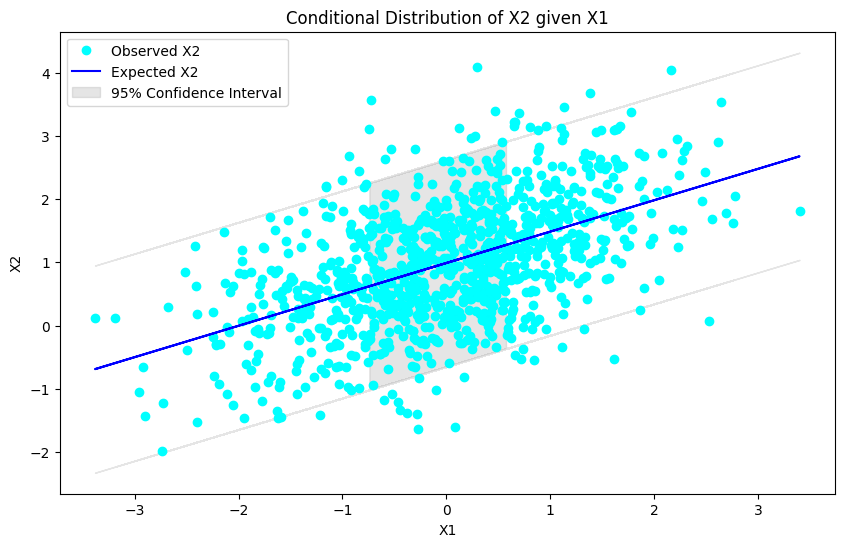

In [162]:
df = pd.read_csv(file2x)

X1 = df['x1']
X2 = df['x2']

mean_X1 = X1.mean()
mean_X2 = X2.mean()
cov_matrix = np.cov(X1, X2)

print(f"Mean of X1: {mean_X1}")
print(f"Mean of X2: {mean_X2}")
print("Covariance Matrix:")
print(cov_matrix)

cov_X1X1 = cov_matrix[0, 0]  # Σ_11
cov_X1X2 = cov_matrix[0, 1]  # Σ_12 = Σ_21
cov_X2X2 = cov_matrix[1, 1]  # Σ_22

print(f"Cov(X1, X1): {cov_X1X1}")
print(f"Cov(X1, X2): {cov_X1X2}")
print(f"Cov(X2, X2): {cov_X2X2}")

conditional_means = []
conditional_stds = []

for x1 in X1:
    # μ_2|1
    mean_conditional = mean_X2 + cov_X1X2 / cov_X1X1 * (x1 - mean_X1)
    conditional_means.append(mean_conditional)
    
    # σ_2|1^2
    var_conditional = cov_X2X2 - (cov_X1X2 ** 2) / cov_X1X1
    conditional_stds.append(np.sqrt(var_conditional))

conditional_means = np.array(conditional_means)
conditional_stds = np.array(conditional_stds)

# 95% IC
lower_bound = conditional_means - 1.96 * conditional_stds
upper_bound = conditional_means + 1.96 * conditional_stds

# plot
plt.figure(figsize=(10, 6))
plt.plot(X1, X2, 'o', label='Observed X2', color='cyan')
plt.plot(X1, conditional_means, label='Expected X2', color='blue')
plt.fill_between(X1, lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Conditional Distribution of X2 given X1')
plt.legend()
plt.show()


Problem 2-4. (1 point Extra Credit). 𝑌 = 𝑋𝜷 + ϵ 𝑎𝑛𝑑 ϵ ~ 𝑁(0, σ^2). Derive the maximum likelihood estimators for β and σ^2


e~N(0, σ^2)  
Y∼N(Xβ, σ^2I)  
PDF(Y): f(Y ∣ X, β, σ²) = 1/(2πσ²)^(n/2) * exp( - (Y - Xβ)ᵀ (Y - Xβ) / (2σ²) )  
ll(β,σ²) = -n/2 * log(2π) - n/2 * log(σ²) - 1/(2σ²) * (Y - Xβ)ᵀ (Y - Xβ)  

β^:
∂ll(β,σ²)/∂β = 1/σ² * Xᵀ(Y - Xβ)  -> 0
Xᵀ(Y - Xβ) = 0  
β^ = (XᵀX)⁻¹XᵀY

σ²:
∂ll(β,σ²)/∂σ² = -n/(2σ²) + 1/(2σ⁴) * (Y - Xβ)ᵀ(Y - Xβ) -> 0
σ²^ = (Y - Xβ^)ᵀ(Y - Xβ^) / n

Problem 3 (2pts)  
Examine the data in problem3.csv;  
which AR(n) or MA(n) model do you expect to fit this databest?  
Fit the data using AR(1) - AR(3) and MA(1) - MA(3) models. Which is the best fit and does this confirm your hypothesis?

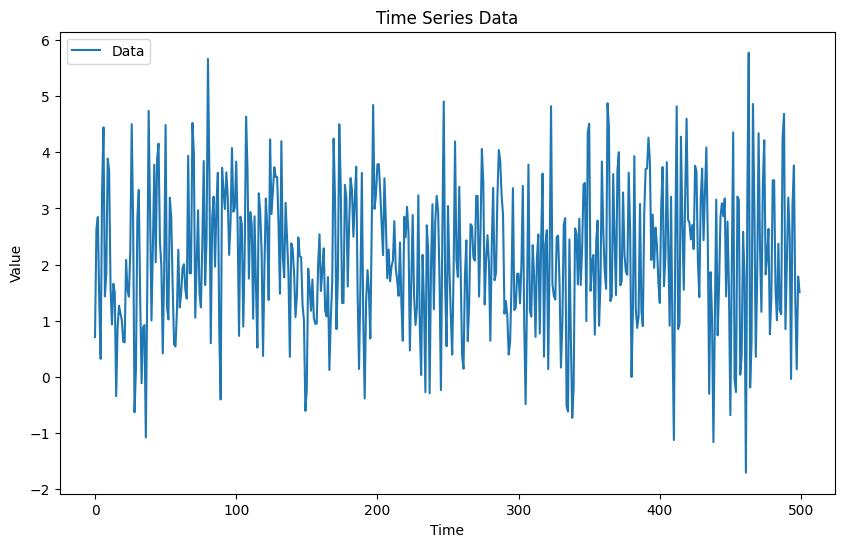

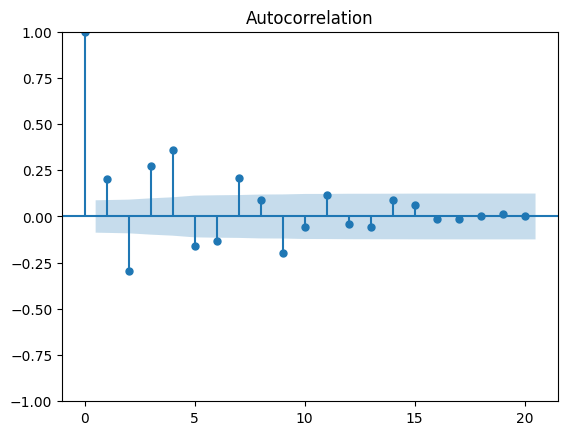

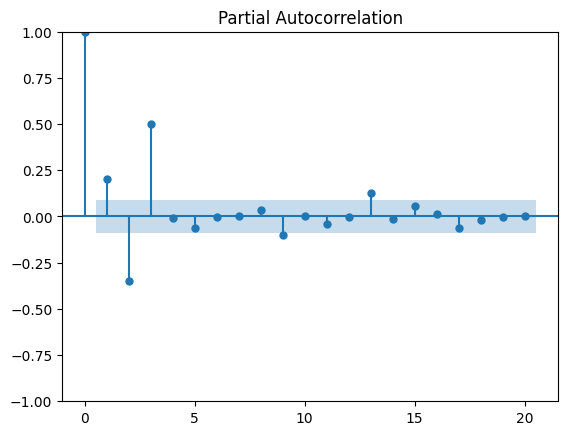

ARIMA(1, 0, 0) - AIC: 1644.6555047688475
ARIMA(2, 0, 0) - AIC: 1581.0792659049775
ARIMA(3, 0, 0) - AIC: 1436.6598066945826
ARIMA(0, 0, 1) - AIC: 1567.4036263707872
ARIMA(0, 0, 2) - AIC: 1537.941206380739
ARIMA(0, 0, 3) - AIC: 1536.8677087350306


In [153]:
df = pd.read_csv(file3)

# Time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='Data')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# ACF
plot_acf(df, lags=20)
plt.show()

# PACF
plot_pacf(df, lags=20)
plt.show()

# AIC
time_series_data = df.iloc[:, 0]

# AR(1)-AR(3) & MA(1)-MA(3) 
orders = [(1, 0, 0), (2, 0, 0), (3, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)]

for order in orders:
    model = ARIMA(time_series_data, order=order)
    model_fit = model.fit()
    print(f'ARIMA{order} - AIC: {model_fit.aic}')

The ACF shows a strong initial autocorrelation followed by a rapid decline. Indicates that the data may be amenable to a AR model, such as the AR(1) model, capturing the relationship between the current value and the previous period.
The PACF shows a strong correlation at lag 1 and lag 2, indicating that we may need a multi-lag AR model such as AR(2) or AR(3).

The AR(3) model has the lowest AIC value, suggesting that the AR(3) model may be more appropriate for this data set.
The MA(1) to MA(3) models have higher AIC values, indicating that the AR model captures the characteristics of the data better than the MA model.

Based on the ACF and PACF, and the AIC values, AR(3) is the most appropriate model for this data.